## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa prosta

Regresja liniowa prosta, to szczególny przypadek regresji liniowej, w którym zmienną objaśnaną przewidujemy za pomocą jednej zmiennej objaśniającej. Zadanie będzie polegało na wyznaczeniu funkcji regresji opisującej zależność zarobków od lat doświadczenia. 

Zbiór danych do tego zadania, to Salary.csv. Znajduje się w katalogu datasets.
W zbiorze danych znajduje się 35 obserwacji. Każdy wpis jest osobną obserwacją. W zbiorze znajdują się 3 kolumny: YearsExperience, Age i Salary. W pierwszym zadaniu należy wykorzystać YearsExperience i Salary, pomijając Age.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple

### Zadanie 1

Wczytaj dane z pliku Salary.csv, a następnie stwórz wykres przedstawiający obserwacje.

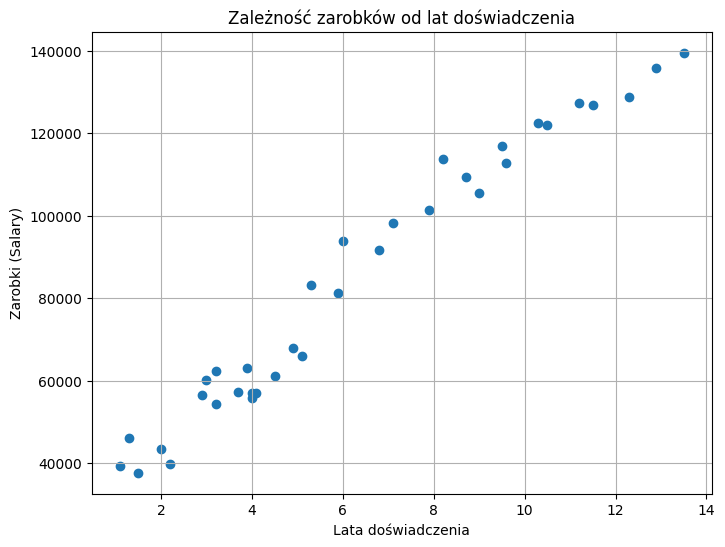

In [2]:
df = pd.read_csv('./Salary.csv')

plt.figure(figsize=(8, 6))
plt.scatter(df['YearsExperience'], df['Salary'], marker='o')
plt.title('Zależność zarobków od lat doświadczenia')
plt.xlabel('Lata doświadczenia')
plt.ylabel('Zarobki (Salary)')
plt.grid(True)
plt.show()


### Zadanie 2

Implementacja algorytmu regresji liniowej prostej.

Żeby dobrze zrozumieć zapis matematyczny, który początkowo może sprawiać problemy, przejdziemy po kolei po elementach składowych algorytmu. Następnie złączymy elementy w całość.

Wzór na regresję liniową w naszym przypadku będzie wyglądał następująco:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 = \beta_{0} + \beta_{1}  YearsExperience
\end{equation}

Przypomnijmy, że zapis $x^{(i)}$ oznacza wektor dla $i$-tej obserwacji. W naszym przypadku ten wektor będzie zawierał tylko $1$ wartość dla cechy $YearsExperience$.


_Uwaga: W różnych źródłach algorytm regresji liniowej ma różne zapisy. Czasem podawane są wzory w postaci z sumą, czasem w postaci macierzowej. Jest to spowodowane tym, że algorytm można zaimplementować na te dwa sposoby. Łatwiejszym i bardziej intuicyjnym podejściem jest podejście z sumą, która bezpośrednio sugeruje wykokrzystanie pętli w celu iteracji po obserwacjach/cechach. Implementacja z wykorzystaniem macierzy jest zwykle krótsza i "bardziej elegancka", ale również bardziej wydajna. Aby dobrze zrozumieć działanie algorytmu, najlepiej jest zaimplementować obie wersje i porównać je ze sobą._


#### 2.1 Inicjalizacja współczynników $\beta$ regresji

Pierwszym krokiem jest inicjalizacja współczynników regresji. W przypadku regresji liniowej prostej mamy dwa współczynniki $\beta_{0}$ i $\beta_{1}$. Stwórz dwie zmienne będące współczynnikami regresji liniowej prostej i zainicjalizuj je losowymi wartościami z przedziału $(0,1)$.

Dodatkowo stwórz zmienną *alpha*, która przyjmie wartość od $(0,1)$. Możesz ustawić ją ręcznie i sprawdzać jak różne wartości mają wpływ na regresję. 

In [37]:
import random


def initialize_coefficients() -> Tuple[float, float, float]:
    # random.seed(123)
    beta_0 = random.uniform(0, 1)  
    beta_1 = random.uniform(0, 1)  
    alpha = 0.01  

    return beta_0, beta_1, alpha

#### 2.2 Obliczenie predykcji

Kolejnym krokiem jest obliczenie wartości funkcji regresji dla wszystkich obserwacji w zbiorze danych. Jest to po prostu wstawienie kolejnych wartości pod wzrór regresji.

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1
\end{equation}

Można zrobić to z wykorzystaniem operacji na macierzach (wektorach), albo z wykorzystaniem klasycznej iteracji. 

In [27]:
def calculate_regression_function(x: np.ndarray, beta0: float, beta1: float) -> np.ndarray:
    return beta0 + beta1 * x


In [29]:
x = np.array(df['YearsExperience'])
beta0, beta1,alpha = initialize_coefficients()    
print(beta0,beta1)
predictions = calculate_regression_function(x, beta0, beta1)
print(predictions)

0.052363598850944326 0.08718667752263232
[0.14826894 0.16570628 0.18314362 0.22673695 0.24417429 0.30520496
 0.31392363 0.33136097 0.33136097 0.37495431 0.39239164 0.40111031
 0.40111031 0.40982898 0.44470365 0.47957832 0.49701565 0.51445299
 0.566765   0.57548366 0.64523301 0.67138901 0.74113835 0.76729435
 0.81088769 0.8370437  0.88063704 0.8893557  0.95038638 0.96782371
 1.02885439 1.05501039 1.12475973 1.17707174 1.22938375]


#### 2.3 Obliczenie błędu

Obliczenie wartości błędu regresji nie jest konieczne do aktualizacji wag, jednak jest to bardzo cenna informacja czy nasz algorytm działa poprawnie. Wartość błędu nie może rosnąć w kolejnych epokach.

Błąd należy obliczyć zgodnie ze wzorem:

\begin{equation}
    SSR = \frac{1}{2m} \sum_{i=1}^{m}(f(x^{(i)}) - y^{(i)})^2
\end{equation}

In [30]:
def calculate_error(predictions: np.ndarray, y: np.ndarray, beta0: float, beta1: float) -> float:
    m = len(y)  
    error = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return error

In [31]:
y = np.array(df['Salary'])
predictions = calculate_regression_function(x, beta0, beta1)

error = calculate_error(predictions, y, beta0, beta1)
print("Błąd regresji (SSR):", error)


Błąd regresji (SSR): 4022185522.697835


#### 2.4 Obliczenie gradientu 

Żeby obliczyć gradient, należy obliczyć pochodne cząstkowe względem parametrów $\beta_{0}$ i $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{0}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})
\end{equation}

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{1}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Tutaj ponownie jak wcześniej można wykorzystać operacje na macierzach, lub iteracyjnie obliczyć sumę.

In [ ]:
def calculate_gradient(predictions: np.ndarray, y: np.ndarray, x: np.ndarray) -> Tuple[float, float]:
    m = len(y)  

    diff = predictions - y  

    d_beta0 = (1 / m) * np.sum(diff)
    d_beta1 = (1 / m) * np.sum(diff * x)

    return d_beta0, d_beta1


In [33]:

d_beta0, d_beta1 = calculate_gradient(predictions, y, x)
print("Gradient beta0:", d_beta0)
print("Gradient beta1:", d_beta1)


Gradient beta0: -83887.82618444695
Gradient beta1: -640461.0993370843


####  2.5 Aktualizacja współczynników regresji (wag)

Po obliczeniu pochodnych cząstkowych należy obliczyć nowe wartości dla współczynników regresji.


\begin{equation}
    \beta_{0} = \beta_{0} - \alpha \frac{\partial SSR}{\partial \beta_{0}} 
\end{equation}

\begin{equation}
    \beta_{1} = \beta_{1} - \alpha \frac{\partial SSR}{\partial \beta_{1}} 
\end{equation}

In [ ]:

def update_regression_coefficients(x: np.ndarray, y: np.ndarray, beta0: float, beta1: float, alpha: float) -> Tuple[float, float]:
    predictions = calculate_regression_function(x, beta0, beta1)
    d_beta0, d_beta1 = calculate_gradient(predictions, y, x)

    beta0 = beta0 - alpha * d_beta0
    beta1 = beta1 - alpha * d_beta1

    return beta0, beta1


In [35]:
beta0, beta1 = update_regression_coefficients(x, y, beta0, beta1, alpha)

print("Zaktualizowane beta0:", beta0)
print("Zaktualizowane beta1:", beta1)


Zaktualizowane beta0: 838.9306254433204
Zaktualizowane beta1: 6404.698180048365


#### 2.6 Finalna wersja algorytmu

Powyższe działania, to wszystkie elementy potrzebne do stworzenia algorytmu regresji liniowej prostej. Jeden cykl takich operacji nazywany jest **epoką**. Idea obliczania współczynników regresji z wykorzystaniem gradientu polega na iteracyjnym aktualizowaniu współczynników do momentu, aż błąd przestanie znacznie się zmieniać. Można również ustawić jakaś stałą ilość epok. W każdej epoce wykorzystuje się ponownie ten sam zestaw danych.

Skoro wiadomo już jakie pojedyncze etapy należy wykonać, żeby obliczyć regresję liniową prostą, przyszedł czas na zebranie wszystkiego w jednym miejscu.

Proszę zaimplementować funkcję `learn_and_fit(x, y)`, która dla danych wejściowych będzie zwracać współczynniki regresji w każdej z epok. Dodatkowo proszę zwracać również błąd regresji w każdej epoce. Funkcja może być zaimplementowana w dowolny sposób. Może bezpośrednio zawierać wszystkie instrukcje, może korzystać z innych funkcji pomocniczych albo może korzystać z klasy reprezentującą regresję liniową prostą. 

Na końcu notebooka znajduje się test jednostkowy, który musi przechodzić przy prawidłowej implementacji algorytmu.

In [ ]:
'''
input:
x - wartości zmiennej objaśniającej YearsExperience dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
b1: [] - lista z współczynnikami beta_1 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''

def learn_and_fit(x: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    beta0, beta1, alpha = initialize_coefficients()
    
    epochs = 1000  

    b0_list = []
    b1_list = []
    error_list = []

    for _ in range(epochs):
        predictions = calculate_regression_function(x, beta0, beta1)

        error = calculate_error(predictions, y, beta0, beta1)

        b0_list.append(beta0)
        b1_list.append(beta1)
        error_list.append(error)

        beta0, beta1 = update_regression_coefficients(x, y, beta0, beta1, alpha)

    return np.array(b0_list), np.array(b1_list), np.array(error_list)


In [39]:
b0, b1, error = learn_and_fit(x, y)

print("Ostatnia wartość beta0:", b0[-1])
print("Ostatnia wartość beta1:", b1[-1])
print("Ostatni błąd:", error[-1])

Ostatnia wartość beta0: 26211.0311738864
Ostatnia wartość beta1: 9047.97166835635
Ostatni błąd: 17879601.947247066


### Zadanie 3

Stwórz wykres zmiany błędu regresji (oś Y) względem epoki (oś X)

In [40]:
def plot_error_over_epochs(error: np.ndarray):
    plt.figure(figsize=(10, 6))
    plt.plot(error)
    plt.title('Zmiana błędu regresji w trakcie epok')
    plt.xlabel('Epoka')
    plt.ylabel('Błąd (SSR)')
    plt.grid(True)
    plt.show()


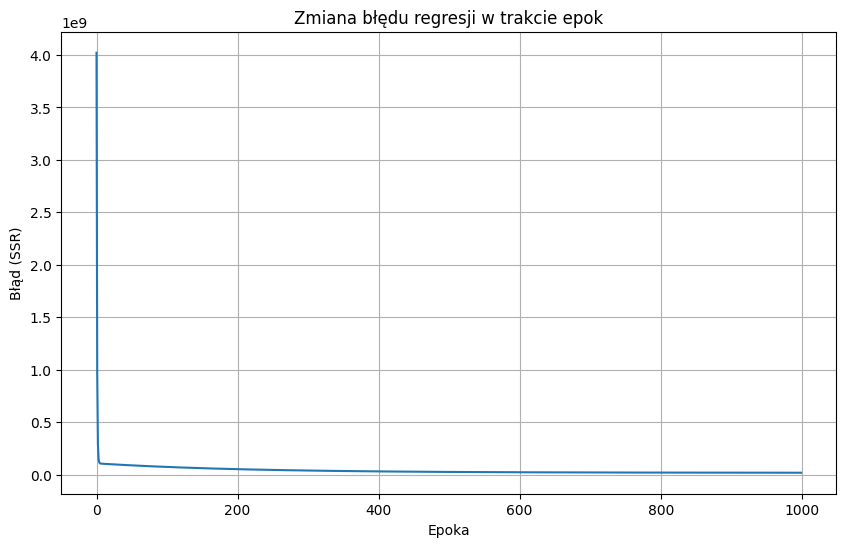

In [41]:
plot_error_over_epochs(error)


### Zadanie 4

Do wykresu stworzonego w zadaniu 1 dodaj prostą regresji. Stwórz 3 wykresy przedstawiające jak zmieniała się funkcja regresji na przestrzeni epok (pierwsza, środkowa, ostatnia epoka).

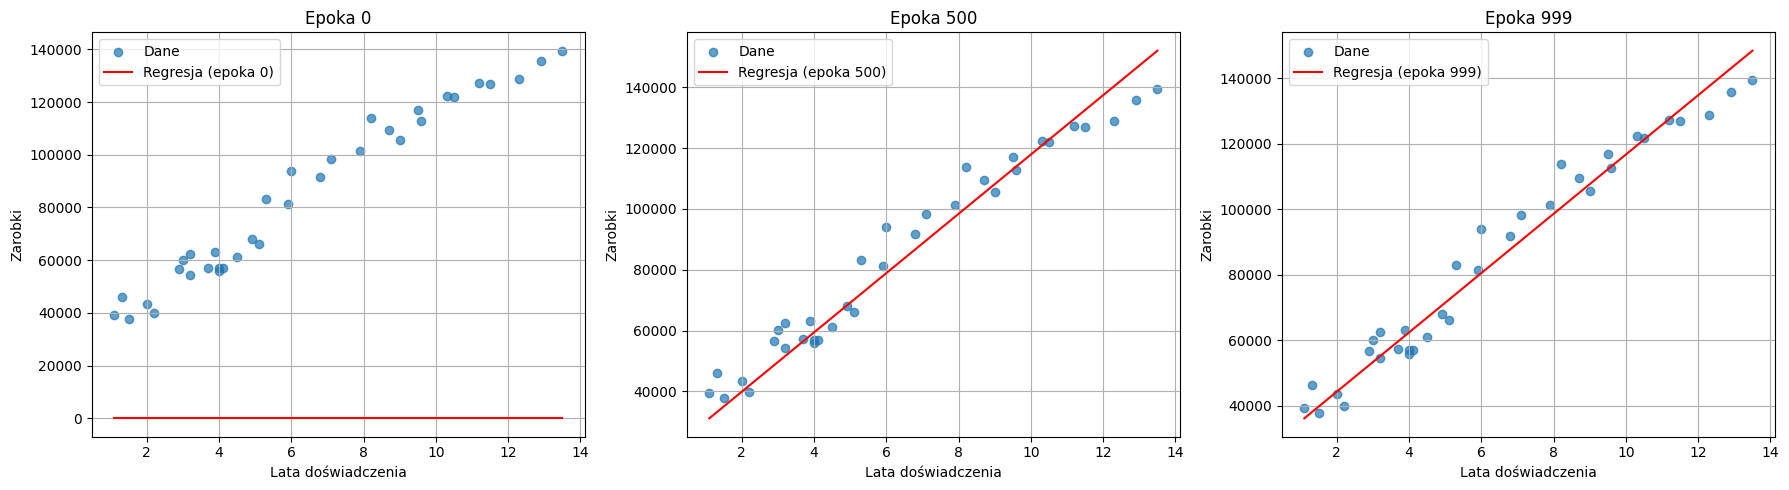

In [44]:
epochs = len(b0)
epoch_indices = [0, epochs // 2, epochs - 1]

x_line = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(18, 5))

for i, idx in enumerate(epoch_indices):
    beta0 = b0[idx]
    beta1 = b1[idx]
    y_line = calculate_regression_function(x_line, beta0, beta1)

    plt.subplot(1, 3, i+1)
    plt.scatter(x, y, label='Dane', alpha=0.7)
    plt.plot(x_line, y_line, label=f'Regresja (epoka {idx})', color='red')
    plt.title(f'Epoka {idx}')
    plt.xlabel('Lata doświadczenia')
    plt.ylabel('Zarobki')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### Zadanie 5

Wybierz dowolnie trzy różne wartości współczynnika $\alpha$. Ile epok mu zostać użytych żeby otrzymać zamierzoną wartość błędu?

In [95]:
def learn_until_target(
    x: np.ndarray, 
    y: np.ndarray, 
    alpha: float, 
    target_error: float = 1e7, 
    max_epochs: int = 100000,
    tolerance: float = 1e-3
) -> Tuple[int, list, list, list]:
    beta0, beta1, _ = initialize_coefficients()
    errors = []
    b0s = []
    b1s = []

    for epoch in range(max_epochs):
        predictions = calculate_regression_function(x, beta0, beta1)
        error = calculate_error(predictions, y, beta0, beta1)

        if np.isnan(error) or np.isinf(error) or np.isnan(beta0) or np.isinf(beta1):
            print(f"Uczenie przerwane — niestabilność numeryczna przy alpha={alpha}, epoka={epoch}")
            break

        b0s.append(beta0)
        b1s.append(beta1)
        errors.append(error)

        if error <= target_error:
            print(f"Osiągnięto błąd {error:.2f} przy alpha={alpha} w epoce {epoch + 1}")
            break

        if epoch > 0 and abs(errors[-1] - errors[-2]) < tolerance:
            print(f"Early stopping — mała zmiana błędu ({abs(errors[-1] - errors[-2]):.5f}) przy alpha={alpha}, epoka={epoch + 1}")
            break

        beta0, beta1 = update_regression_coefficients(x, y, beta0, beta1, alpha)

    return epoch + 1, errors, b0s, b1s


Early stopping — mała zmiana błędu (0.00001) przy alpha=0.001, epoka=46450
Alpha=0.001 ➤ Uczenie trwało 46450 epok, ostatni błąd: 17120732.09
Early stopping — mała zmiana błędu (0.00001) przy alpha=0.01, epoka=5124
Alpha=0.01 ➤ Uczenie trwało 5124 epok, ostatni błąd: 17120732.07
Uczenie przerwane — niestabilność numeryczna przy alpha=0.1, epoka=234
Alpha=0.1 ➤ Uczenie trwało 235 epok, ostatni błąd: 1260183914341315067713347662445544919417478838528342863686631257500100375828886174358909165085780605650783278053859043511083549483116148997364620754527227975789262376521342476538671209488399506438706225529280613371193948762793566731695598391388085014897635274870170136911111810470863281286953771092838187008.00


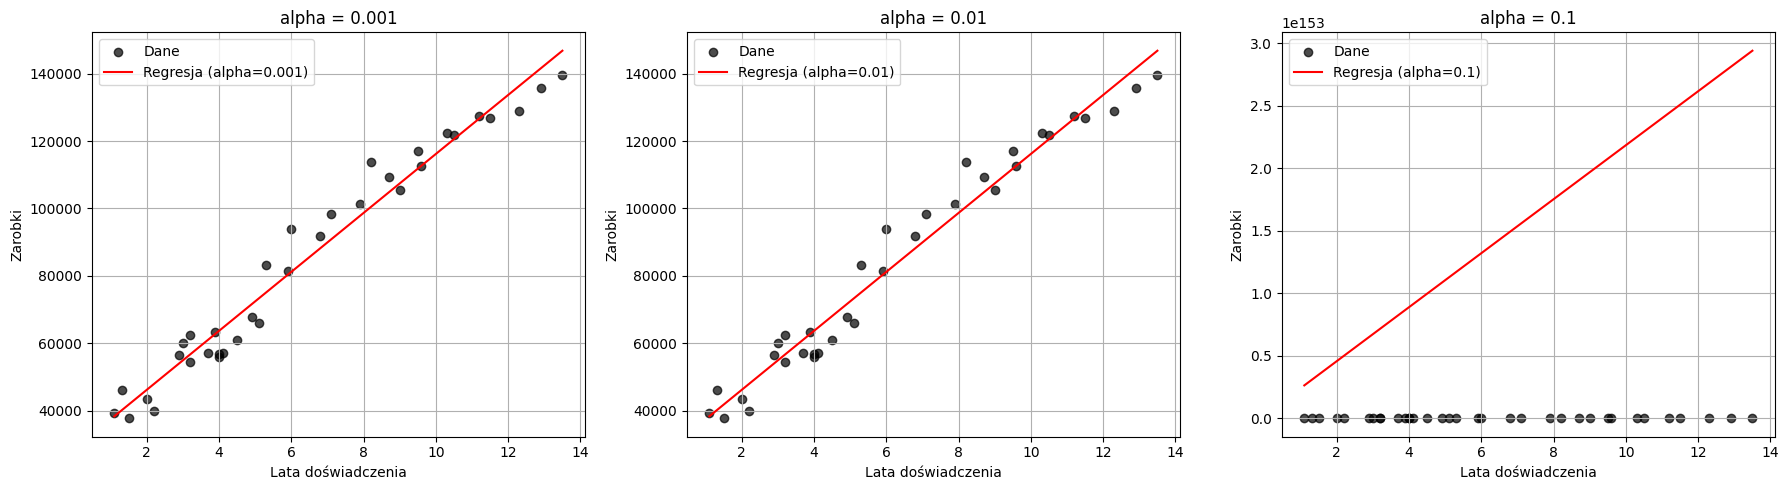

In [101]:
alphas = [0.001, 0.01, 0.1]

x_line = np.linspace(min(x), max(x), 100)

plt.figure(figsize=(18, 5))

for i, alpha in enumerate(alphas):
    epochs, errors, b0s, b1s = learn_until_target(x, y, alpha, target_error=1e7, tolerance=1e-5)
    print(f"Alpha={alpha} ➤ Uczenie trwało {epochs} epok, ostatni błąd: {errors[-1]:.2f}")

    beta0 = b0s[-1]
    beta1 = b1s[-1]
    y_line = calculate_regression_function(x_line, beta0, beta1)

    plt.subplot(1, 3, i + 1)
    plt.scatter(x, y, color='black', label='Dane', alpha=0.7)
    plt.plot(x_line, y_line, color='red', label=f'Regresja (alpha={alpha})')
    plt.title(f'alpha = {alpha}')
    plt.xlabel('Lata doświadczenia')
    plt.ylabel('Zarobki')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [102]:
def plot_errors_for_alphas(x: np.ndarray, y: np.ndarray, alphas: list, target_error: float = 1e7, tolerance: float = 1e-3):
    plt.figure(figsize=(10, 6))

    for alpha in alphas:
        epochs, errors, _, _ = learn_until_target(
            x, y, alpha, target_error=target_error, tolerance=tolerance
        )
        plt.plot(range(1, len(errors)+1), errors, label=f'alpha={alpha} ({epochs} epok)')

    plt.title('Porównanie błędu regresji (SSR) dla różnych alpha')
    plt.xlabel('Epoka')
    plt.ylabel('Błąd (SSR)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Early stopping — mała zmiana błędu (0.00100) przy alpha=0.001, epoka=36807
Early stopping — mała zmiana błędu (0.00100) przy alpha=0.01, epoka=4160
Uczenie przerwane — niestabilność numeryczna przy alpha=0.1, epoka=234


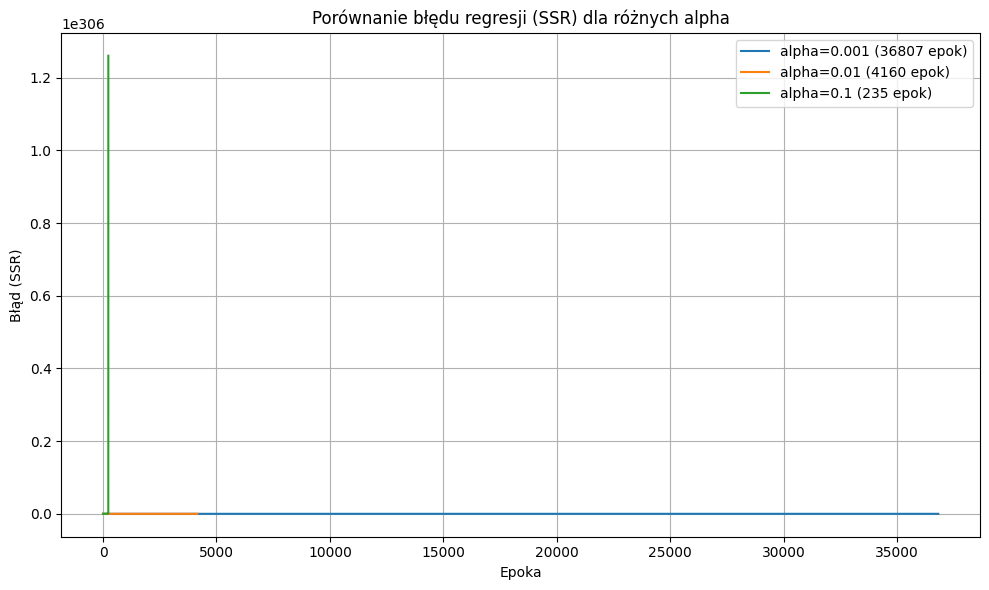

In [103]:
alphas = [0.001, 0.01, 0.1]
plot_errors_for_alphas(x, y, alphas)


### Testy jednostkowe

In [68]:
import unittest
import pandas as pd

class SimpleLinearRegressionTest(unittest.TestCase):
    
    def test_learn_and_fit(self):
        df = pd.read_csv('./Salary.csv', sep=',')
        x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
        y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
        
        b0, b1, error = learn_and_fit(x, y)
        
        self.assertTrue(len(b0) > 1)
        self.assertTrue(len(b1) > 1)
        self.assertTrue(len(b0) == len(b1))
        self.assertTrue(all(i >= j for i, j in zip(error, error[1:]))) #Sprawdzenie, czy błędy nie rosną
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_learn_and_fit (__main__.SimpleLinearRegressionTest.test_learn_and_fit) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.015s

OK


### Zadanie 6

Stwórz test jednostkowy sprawdzający czy funkcja inicjalizująca współczynniki regresji zwraca wartości z przedziału (0, 1)

In [ ]:
import unittest

class CoefficientInitializationTest(unittest.TestCase):
    
    def test_initialize_coefficients_range(self):
        beta0, beta1, alpha = initialize_coefficients()
        
        self.assertTrue(0 < beta0 < 1, "beta0 jest w przedziale (0, 1)")
        self.assertTrue(0 < beta1 < 1, "beta1 jest w przedziale (0, 1)")
        self.assertTrue(0 < alpha < 1, "alpha jest w przedziale (0, 1)")

unittest.main(argv=[''], verbosity=2, exit=False)


test_initialize_coefficients_range (__main__.CoefficientInitializationTest.test_initialize_coefficients_range) ... ok
test_learn_and_fit (__main__.SimpleLinearRegressionTest.test_learn_and_fit) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.020s

OK
